In [1]:
import scipy
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

for m in [scipy, np, pd, matplotlib]:
    print(m.__name__, m.__version__)

from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

from funcs.factor_utils import FactorUtil

scipy 1.15.2
numpy 1.26.4
pandas 2.2.3
matplotlib 3.10.1


In [2]:
bar_df_1 = FactorUtil.get_bar_df('FG2409_MIN_1', '20240813', '00:00:00', 200)
bar_df_1.head()

,O,H,L,C,V,AP,AV,BP,BV
ts,,,,,,,,,
2024-08-13 09:00:00,1278.0,1278.0,1276.0,1276.0,681,1278.000,218,1276.000,152
2024-08-13 09:01:00,1277.0,1282.0,1276.0,1278.0,5557,1279.737,21421,1278.345,17282
2024-08-13 09:02:00,1278.0,1279.0,1276.0,1278.0,1634,1278.102,43934,1277.119,31489
2024-08-13 09:03:00,1277.0,1282.0,1277.0,1281.0,3749,1280.911,33442,1279.997,33766
2024-08-13 09:04:00,1281.0,1281.0,1279.0,1280.0,1619,1280.149,41884,1279.158,46279


In [3]:
# smoth process
# window_length是窗口长度，必须是正奇整数
# polyorder 多项式阶数，一般选择2或3，避免高阶带来的不稳定性
s_close = savgol_filter(bar_df_1['C'], window_length=11, polyorder=3)
bar_df_1['S'] = s_close

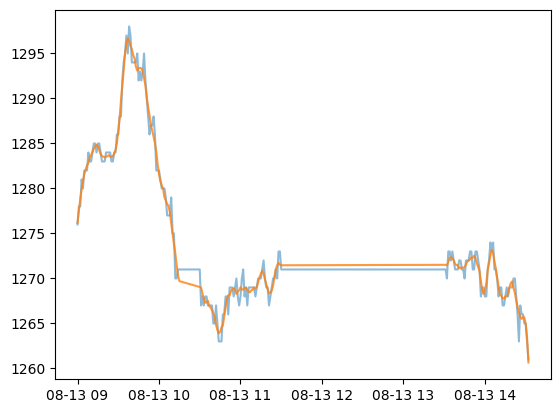

In [4]:
plt.plot(bar_df_1.index, bar_df_1['C'], label='C', alpha=0.5)
plt.plot(bar_df_1.index, bar_df_1['S'], label='S', alpha=0.8)
plt.show()

In [5]:
peaks, _ = find_peaks(s_close, height=10, distance=10, prominence=5)
peaks

array([ 37, 172])

In [6]:
# 获取 37 & 172 的 index
bar_df_1.index[37], bar_df_1.index[172]

(Timestamp('2024-08-13 09:37:00'), Timestamp('2024-08-13 14:05:00'))

In [7]:
bar_df_1['C'].index[37]

Timestamp('2024-08-13 09:37:00')

In [8]:
bar_df_1.columns.get_loc('S')

9

In [9]:
target_times = [bar_df_1.index[37], bar_df_1.index[172]]

bar_df_1['P'] = np.nan
# bar_df_1.iloc[0]['S'] = bar_df_1.iloc[0]['C'] -- not work
# bar_df_1.loc[bar_df_1.index[0], 'S'] = bar_df_1.iloc[0]['C'] -- work
# bar_df_1.iloc[0, bar_df_1.columns.get_loc('S')] = 102
bar_df_1.head()

,O,H,L,C,V,AP,AV,BP,BV,S,P
ts,,,,,,,,,,,
2024-08-13 09:00:00,1278.0,1278.0,1276.0,1276.0,681,1278.000,218,1276.000,152,1276.167832,NaN
2024-08-13 09:01:00,1277.0,1282.0,1276.0,1278.0,5557,1279.737,21421,1278.345,17282,1277.545455,NaN
2024-08-13 09:02:00,1278.0,1279.0,1276.0,1278.0,1634,1278.102,43934,1277.119,31489,1278.780886,NaN
2024-08-13 09:03:00,1277.0,1282.0,1277.0,1281.0,3749,1280.911,33442,1279.997,33766,1279.870629,NaN
2024-08-13 09:04:00,1281.0,1281.0,1279.0,1280.0,1619,1280.149,41884,1279.158,46279,1280.811189,NaN


In [10]:
c = bar_df_1.columns.get_loc('P')
for p in peaks:
    print(p, bar_df_1.iloc[p]['H'])
    bar_df_1.iloc[p, c] = bar_df_1.iloc[p]['H']

37 1298.0
172 1274.0


In [11]:
bar_df_1.iloc[35:40]

,O,H,L,C,V,AP,AV,BP,BV,S,P
ts,,,,,,,,,,,
2024-08-13 09:35:00,1293.0,1295.0,1293.0,1295.0,3292,1294.277,95592,1293.053,171073,1295.037296,NaN
2024-08-13 09:36:00,1295.0,1298.0,1294.0,1297.0,7101,1295.498,221627,1294.233,150437,1296.137529,NaN
2024-08-13 09:37:00,1298.0,1298.0,1295.0,1295.0,6615,1296.705,88940,1295.361,68485,1296.682984,1298.0
2024-08-13 09:38:00,1296.0,1298.0,1295.0,1298.0,4535,1297.717,125986,1296.634,97491,1296.365967,NaN
2024-08-13 09:39:00,1297.0,1299.0,1297.0,1297.0,4911,1298.897,77731,1297.820,123619,1295.811189,NaN


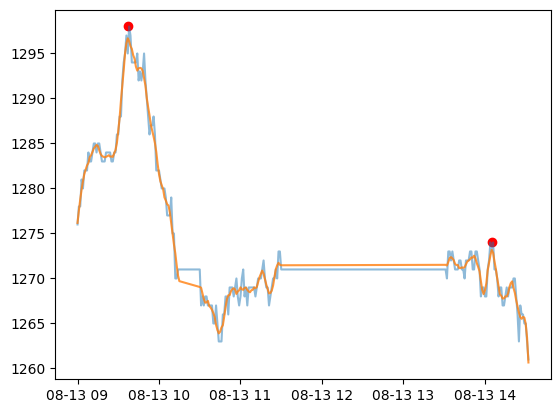

In [12]:
# bar_df_1.head(38)
plt.plot(bar_df_1.index, bar_df_1['C'], label='C', alpha=0.5)
plt.plot(bar_df_1.index, bar_df_1['S'], label='S', alpha=0.8)
plt.scatter(bar_df_1.index, bar_df_1['P'], color='red', marker='o', label='P')
plt.show()

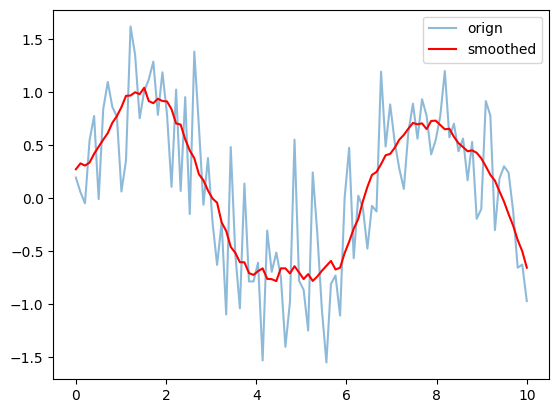

In [13]:
import warnings
warnings.filterwarnings("ignore")

# 生成含噪声的示例数据
t = np.linspace(0, 10, 100)
data = np.sin(t) + 0.5 * np.random.randn(100)

# 应用 Savitzky-Golay 滤波
smoothed = savgol_filter(
    data, 
    window_length=21,  # 窗口长度
    polyorder=3,       # 多项式阶数
    mode='nearest'     # 边界处理模式
)

# 可视化对比
plt.plot(t, data, label='orign', alpha=0.5)
plt.plot(t, smoothed, label='smoothed', color='red')
plt.legend()
plt.show()

In [4]:
# find_peaks 计算波峰波谷
# 检测波峰
peaks, _ = find_peaks(s_close, height=10, distance=10, prominence=5)
# 检测波谷（取反后找波峰）
troughs, _ = find_peaks(-s_close, height=10, distance=10, prominence=5)
peaks, troughs

(array([ 38, 161, 172]), array([], dtype=int64))

In [5]:
def build_peaks(df):
    s = savgol_filter(df['C'], window_length=5, polyorder=2)
    df['S'] = s
    # print(df.head())
    peaks, _ = find_peaks(s, height=10, distance=10, prominence=5)
    troughs, _ = find_peaks(-s, height=10, distance=10, prominence=5)
    df.assign(P=np.nan)
    for idx in peaks:
        print(idx)
        df_idx = df['S'].iloc[idx].index
        print(df['S'].iloc[idx])
        df.loc[df_idx, 'P'] = df['S'].iloc[idx]
    

In [7]:
bar_df_1.head()

,O,H,L,C,V,AP,AV,BP,BV,S
ts,,,,,,,,,,
2024-08-13 09:00:00,1278.0,1278.0,1276.0,1276.0,681,1278.000,218,1276.000,152,1275.971429
2024-08-13 09:01:00,1277.0,1282.0,1276.0,1278.0,5557,1279.737,21421,1278.345,17282,1277.714286
2024-08-13 09:02:00,1278.0,1279.0,1276.0,1278.0,1634,1278.102,43934,1277.119,31489,1279.028571
2024-08-13 09:03:00,1277.0,1282.0,1277.0,1281.0,3749,1280.911,33442,1279.997,33766,1279.800000
2024-08-13 09:04:00,1281.0,1281.0,1279.0,1280.0,1619,1280.149,41884,1279.158,46279,1281.028571


In [9]:
bar_df_1.assign(P = np.nan)
for idx in peaks:
    df_idx = bar_df_1['S'].iloc[idx].index
    print(bar_df_1['S'].iloc[idx])
    bar_df_1.loc[df_idx, 'P'] = bar_df_1['S'].iloc[idx]

AttributeError: 'numpy.float64' object has no attribute 'index'

In [ ]:
ax = plt.plot(bar_df_1['C'])

In [ ]:
plt.plot(bar_df_1['C'])
plt.plot(peaks, bar_df_1['C'][peaks], "x", label="Peaks")
plt.plot(troughs, bar_df_1['C'][troughs], "o", label="Troughs")
plt.legend()
plt.show()